<a href="https://colab.research.google.com/github/PrashubhAtri/heterogeneousSNNs/blob/main/Baselines/SNN/NeuroInfoBaselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN and Common Techniques

## CNN for MNIST
- Completed

In [ ]:
# imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torchvision.datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.89MB/s]


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

print("Training complete!")

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch 1, Loss: 0.16729293107640927
Epoch 2, Loss: 0.04710294775830369
Epoch 3, Loss: 0.03250654283322708
Epoch 4, Loss: 0.023459596810852492
Epoch 5, Loss: 0.018297917085145214
Training complete!
Accuracy: 99.12%


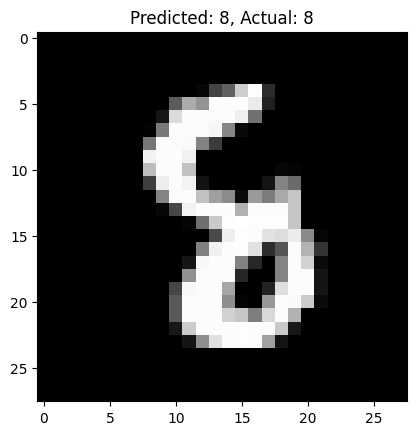

In [ ]:
import numpy as np
import random

id = random.randint(0, len(testset))

image, label = testset[id]
image = image.unsqueeze(0)

output = model(image)
_, predicted = torch.max(output, 1)

plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(f"Predicted: {predicted.item()}, Actual: {label}")
plt.show()

# SpikingJelly - SNNs

## MNIST Dataset
- Accuracy at 95%

In [ ]:
! pip install spikingjelly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.6/437.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import spikingjelly.activation_based as sj
import spikingjelly.activation_based.neuron as neuron
import spikingjelly.activation_based.functional as functional
import spikingjelly.activation_based.surrogate as surrogate

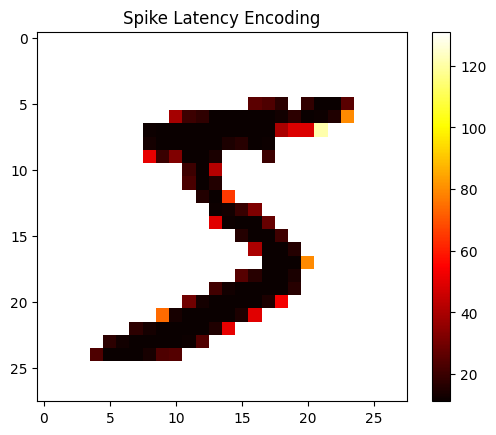

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

def spike_latency_encoding(image, tau=50.0, threshold=0.2):
    image = image.squeeze(0)
    latencies = tau * torch.log(image / (image - threshold))
    latencies[image < threshold] = float('inf')
    return latencies

sample_img, _ = trainset[0]
spike_latencies = spike_latency_encoding(sample_img)

plt.imshow(spike_latencies.numpy(), cmap='hot')
plt.title("Spike Latency Encoding")
plt.colorbar()
plt.show()

In [ ]:
for images, labels in trainloader:
    print(images.shape)  # Should print (batch_size, 1, 28, 28)
    break

torch.Size([64, 1, 28, 28])


In [ ]:
for images, labels in testloader:
    print(images.shape)  # Should print (batch_size, 1, 28, 28)
    break

torch.Size([64, 1, 28, 28])


In [ ]:
class SNN(nn.Module):
    def __init__(self):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input Layer
        self.lif1 = neuron.LIFNode(surrogate_function=surrogate.Sigmoid())  # Correct usage
        self.fc2 = nn.Linear(128, 10)  # Output Layer
        self.lif2 = neuron.LIFNode(surrogate_function=surrogate.Sigmoid())  # Correct usage

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten input
        x = self.lif1(self.fc1(x))
        x = self.lif2(self.fc2(x))
        return x


In [ ]:
model = SNN()
sample_input = torch.randn(64, 1, 28, 28)  # Fake batch of MNIST images
output = model(sample_input)
print(output.shape)  # Should be (64, 10)

torch.Size([64, 10])


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 5
time_steps = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True):
        optimizer.zero_grad()

        # Reset neuron states before processing a new batch
        functional.reset_net(model)

        images = images.view(images.shape[0], -1)

        spike_inputs = torch.zeros((images.shape[0], time_steps, 784))
        latencies = spike_latency_encoding(images)

        for t in range(time_steps):
            spike_inputs[:, t, :] = (latencies.view(latencies.shape[0], -1) < (t + 1) * 5).float()

        outputs = model(spike_inputs.mean(dim=1))

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainset)}")


Epoch 1, Loss: 0.024949900821844735
Epoch 2, Loss: 0.02366651953260104
Epoch 3, Loss: 0.02349135568936666
Epoch 4, Loss: 0.023378476770718894
Epoch 5, Loss: 0.023301302979389826


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in torch.utils.data.DataLoader(testset, batch_size=64):
        functional.reset_net(model)
        images = images.view(images.shape[0], -1)
        spike_inputs = torch.zeros((images.shape[0], time_steps, 28 * 28))
        latencies = spike_latency_encoding(images)

        for t in range(time_steps):
            spike_inputs[:, t, :] = (latencies.view(latencies.shape[0], -1) < (t + 1) * 5).float()

        outputs = model(spike_inputs.mean(dim=1))
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 94.05%


## Synthetic Smooth Random Manifold Spiking Data Set
- Result coming
- Accuracy way off

In [ ]:
!pip install snntorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import snntorch as snn
from snntorch import surrogate
import torch.optim.lr_scheduler as lr_scheduler
import pandas as pd

# Load Dataset from CSV
file_path = 'spiking_time_dataset.csv'
data = pd.read_csv(file_path)

# Assume the first column is labels and the rest are spike times
labels = torch.tensor(data.iloc[:, 0].values, dtype=torch.long)
spike_times = torch.tensor(data.iloc[:, 1:].values, dtype=torch.float32)

# Convert spike times to spike trains
def convert_to_spike_trains(spike_times, num_time_steps=50):
    num_samples, num_neurons = spike_times.shape
    spike_trains = torch.zeros((num_samples, num_neurons, num_time_steps))
    for t in range(num_time_steps):
        spike_trains[:, :, t] = torch.exp(-((spike_times - t) ** 2) / 2).float()
    return spike_trains

spike_trains = convert_to_spike_trains(spike_times)

# Split into training and testing
train_size = int(0.8 * len(spike_trains))
test_size = len(spike_trains) - train_size
train_spike_trains, test_spike_trains = torch.utils.data.random_split(spike_trains, [train_size, test_size])
train_labels, test_labels = torch.utils.data.random_split(labels, [train_size, test_size])

# Define Improved SNN Model
class SNN(nn.Module):
    def __init__(self, num_inputs=spike_times.shape[1], num_hidden=100, num_outputs=10, beta=0.85):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.bn1 = nn.BatchNorm1d(num_hidden)
        self.lif1 = snn.Leaky(beta=beta, learn_beta=True, threshold=0.5, reset_mechanism="subtract",
                              spike_grad=surrogate.fast_sigmoid(slope=5))

        self.fc2 = nn.Linear(num_hidden, num_outputs)
        # self.bn2 = nn.BatchNorm1d(num_hidden)
        self.lif2 = snn.Leaky(beta=beta, learn_beta=True, threshold=0.5, reset_mechanism="subtract",
                              spike_grad=surrogate.fast_sigmoid(slope=5))

        # self.fc3 = nn.Linear(num_hidden, num_outputs)
        # self.lif3 = snn.Leaky(beta=beta, learn_beta=True, threshold=0.7, reset_mechanism="subtract",
                              # spike_grad=surrogate.fast_sigmoid(slope=5))

        self.dropout = nn.Dropout(0.3)  # Prevent overfitting

        # Xavier Uniform Initialization for Stability
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        batch_size, num_neurons, time_steps = x.shape
        x = x.permute(2, 0, 1)  # (time, batch, neurons)

        # mem1, mem2, mem3 = [torch.zeros(batch_size, layer.out_features, device=x.device)
                            #  for layer in [self.fc1, self.fc2, self.fc3]]
        mem1, mem2 = [torch.zeros(batch_size, layer.out_features, device=x.device)
                             for layer in [self.fc1, self.fc2]]
        spk2_rec = []

        for t in range(time_steps):
            spk1, mem1 = self.lif1(self.bn1(self.fc1(x[t])), mem1)
            # spk2, mem2 = self.lif2(self.bn2(self.fc2(spk1) + spk1), mem2)  # Residual Connection
            # spk2 = self.dropout(spk2)
            # spk3, mem3 = self.lif3(self.fc3(spk2), mem3)
            # spk3_rec.append(spk3)
            spk2, mem2 = self.lif2(self.fc2(spk1), mem2)
            spk2_rec.append(spk2)

        # spk3_rec = torch.stack(spk3_rec, dim=0).mean(0)  # Max-over-time readout
        spk2_rec = torch.stack(spk2_rec, dim=0).mean(0)  # Max-over-time readout
        return spk2_rec

# Instantiate Model
model = SNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

# Data Loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    list(zip(train_spike_trains, train_labels)), batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    list(zip(test_spike_trains, test_labels)), batch_size=batch_size, shuffle=False
)

# Training Loop
num_epochs = 10
torch.autograd.set_detect_anomaly(True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_spikes = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient Clipping
        optimizer.step()
        running_loss += loss.item()
        total_spikes += (outputs > 0).sum().item()  # Count active neurons

    avg_loss = running_loss / len(train_loader)
    scheduler.step()  # Adjust learning rate dynamically
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Spikes: {total_spikes}")

# Testing Loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch [1/10], Loss: 2.0775, Spikes: 12590
Epoch [2/10], Loss: 1.6645, Spikes: 6306
Epoch [3/10], Loss: 1.6045, Spikes: 3947
Epoch [4/10], Loss: 1.6003, Spikes: 3491
Epoch [5/10], Loss: 1.5999, Spikes: 3369
Epoch [6/10], Loss: 1.5995, Spikes: 3294
Epoch [7/10], Loss: 1.5988, Spikes: 3272
Epoch [8/10], Loss: 1.5988, Spikes: 3252
Epoch [9/10], Loss: 1.5989, Spikes: 3231
Epoch [10/10], Loss: 1.5987, Spikes: 3221
Test Accuracy: 53.75%


In [ ]:
spike_times[1]

tensor([74.8825, 45.3203, 56.8354, 67.3241, 35.1018, 18.4770,  9.8592, 90.2051,
         1.6925, 94.1393, 54.4921, 62.1268, 95.6491, 37.7465, 81.6426, 12.3235,
         0.4666, 98.9531, 15.1895, 23.2405, 89.4766, 13.0404, 58.8911, 48.2181,
        77.3262, 50.1658, 61.8191, 64.3078, 40.2995, 63.4450])

## test

In [ ]:
import numpy as np
import torch

def generate_manifold_data(num_samples=1000, num_neurons=100, alpha=3, D=1):
    """
    Generates smooth random manifold spiking data.

    :param num_samples: Number of data points
    :param num_neurons: Number of neurons (input dimension)
    :param alpha: Smoothness parameter of the manifold
    :param D: Intrinsic dimensionality of the manifold
    :return: Spike times tensor
    """
    X = np.random.rand(num_samples, D).squeeze()  # Ensure correct shape (1000,)
    spike_times = np.zeros((num_samples, num_neurons))

    for i in range(num_neurons):
        theta = np.random.rand()  # Random offset per neuron
        spike_times[:, i] = np.sin(2 * np.pi * (X + theta)).squeeze() * alpha

    spike_times = np.clip(spike_times, 0, 50)  # Clip to max simulation time (50ms)
    return torch.tensor(spike_times, dtype=torch.float32)

# Generate training and testing data
num_samples = 1000
num_neurons = 100
train_spikes = generate_manifold_data(num_samples=num_samples, num_neurons=num_neurons)
test_spikes = generate_manifold_data(num_samples=200, num_neurons=num_neurons)
train_labels = torch.randint(0, 10, (num_samples,))  # 10-class classification
test_labels = torch.randint(0, 10, (200,))

In [ ]:
def convert_to_spike_trains(spike_times, num_time_steps=50):
    """
    Converts spike timing data to binary spike trains.

    :param spike_times: Tensor of spike timings
    :param num_time_steps: Number of time steps to simulate
    :return: Binary spike train tensor
    """
    num_samples, num_neurons = spike_times.shape
    spike_trains = torch.zeros((num_samples, num_neurons, num_time_steps))

    for t in range(num_time_steps):
        spike_trains[:, :, t] = (spike_times == t).float()

    return spike_trains

# Convert data
num_time_steps = 50
train_spike_trains = convert_to_spike_trains(train_spikes, num_time_steps)
test_spike_trains = convert_to_spike_trains(test_spikes, num_time_steps)

In [ ]:
class SNN(nn.Module):
    def __init__(self, num_inputs=100, num_hidden=256, num_outputs=10):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = neuron.LIFNode(surrogate_function=surrogate.Sigmoid())
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = neuron.LIFNode(surrogate_function=surrogate.Sigmoid())

    def forward(self, x):
        batch_size, num_neurons, time_steps = x.shape
        x = x.permute(2, 0, 1)  # (time, batch, neurons)
        mem1 = torch.zeros(batch_size, 256, device=x.device)
        mem2 = torch.zeros(batch_size, 10, device=x.device)

        for t in range(time_steps):
            mem1 = self.lif1(self.fc1(x[t]))
            mem2 = self.lif2(self.fc2(mem1))

        return mem2  # Output is the final membrane potential

# Instantiate Model
model = SNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
batch_size = 64

train_loader = torch.utils.data.DataLoader(
    list(zip(train_spike_trains, train_labels)), batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    list(zip(test_spike_trains, test_labels)), batch_size=batch_size, shuffle=False
)

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        functional.reset_net(model)  # Reset neuron states

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

Epoch 1, Loss: 2.3025851249694824
Epoch 2, Loss: 2.3025851249694824
Epoch 3, Loss: 2.3025851249694824
Epoch 4, Loss: 2.3025851249694824
Epoch 5, Loss: 2.3025851249694824
Epoch 6, Loss: 2.3025851249694824
Epoch 7, Loss: 2.3025851249694824
Epoch 8, Loss: 2.3025851249694824
Epoch 9, Loss: 2.3025851249694824
Epoch 10, Loss: 2.3025851249694824


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        functional.reset_net(model)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 10.50%


In [ ]:
!pip install snntorch --upgrade

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import snntorch as snn
from snntorch import surrogate, functional

# Generate Manifold Data
def generate_manifold_data(num_samples=1000, num_neurons=100, alpha=3, D=1):
    X = np.random.rand(num_samples, D).squeeze()
    spike_times = np.zeros((num_samples, num_neurons))

    for i in range(num_neurons):
        theta = np.random.rand()
        spike_times[:, i] = np.sin(2 * np.pi * (X + theta)) * alpha

    spike_times = np.clip(spike_times, 0, 50)
    return torch.tensor(spike_times, dtype=torch.float32)

# Improved Encoding: Probability-based spike generation
def convert_to_spike_trains(spike_times, num_time_steps=50):
    num_samples, num_neurons = spike_times.shape
    spike_trains = torch.zeros((num_samples, num_neurons, num_time_steps))

    for t in range(num_time_steps):
        spike_trains[:, :, t] = torch.exp(-((spike_times - t) ** 2) / 2).float()

    return spike_trains

# Generate training and testing data
num_samples = 1000
num_neurons = 100
train_spikes = generate_manifold_data(num_samples=num_samples, num_neurons=num_neurons)
test_spikes = generate_manifold_data(num_samples=200, num_neurons=num_neurons)

train_spike_trains = convert_to_spike_trains(train_spikes)
test_spike_trains = convert_to_spike_trains(test_spikes)

train_labels = torch.randint(0, 10, (num_samples,))
test_labels = torch.randint(0, 10, (200,))

# Define SNN Model
class SNN(nn.Module):
    def __init__(self, num_inputs=100, num_hidden=256, num_outputs=10):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(
            beta=0.9,
            learn_beta=True,
            threshold=1.0,
            spike_grad=surrogate.fast_sigmoid(slope=25)
        )
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = snn.Leaky(
            beta=0.9,
            learn_beta=True,
            threshold=1.0,
            spike_grad=surrogate.fast_sigmoid(slope=25)
        )

    def forward(self, x):
        batch_size, num_neurons, time_steps = x.shape
        x = x.permute(2, 0, 1)  # (time, batch, neurons)

        # Initialize hidden states
        mem1 = torch.zeros(batch_size, 256, device=x.device)
        mem2 = torch.zeros(batch_size, 10, device=x.device)

        spk1_rec = []
        spk2_rec = []

        for t in range(time_steps):
            # No in-place operations and proper state handling
            spk1, mem1 = self.lif1(self.fc1(x[t]), mem1)
            spk2, mem2 = self.lif2(self.fc2(spk1), mem2)

            spk1_rec.append(spk1)
            spk2_rec.append(spk2)

        # Stack and compute the mean across time steps
        spk2_rec = torch.stack(spk2_rec, dim=0).mean(0)

        return spk2_rec

# Instantiate Model
model = SNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Data Loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    list(zip(train_spike_trains, train_labels)), batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    list(zip(test_spike_trains, test_labels)), batch_size=batch_size, shuffle=False
)

# Training Loop
num_epochs = 50
torch.autograd.set_detect_anomaly(True)  # Enable anomaly detection

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Reset neuron states at the start of each batch
        spk1_rec.detach_()
        spk2_rec.detach_()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backpropagation — Allow BPTT by setting retain_graph=True
        loss.backward(retain_graph=True)
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Testing Loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        # Reset neuron states at the start of each test batch
        spk1_rec.detach_()
        spk2_rec.detach_()

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch [1/50], Loss: 2.3026
Epoch [2/50], Loss: 2.3023
Epoch [3/50], Loss: 2.3015
Epoch [4/50], Loss: 2.2994
Epoch [5/50], Loss: 2.2984
Epoch [6/50], Loss: 2.2977
Epoch [7/50], Loss: 2.2976
Epoch [8/50], Loss: 2.2969
Epoch [9/50], Loss: 2.2975
Epoch [10/50], Loss: 2.2972
Epoch [11/50], Loss: 2.2976
Epoch [12/50], Loss: 2.2962
Epoch [13/50], Loss: 2.2962
Epoch [14/50], Loss: 2.2963
Epoch [15/50], Loss: 2.2952
Epoch [16/50], Loss: 2.2956
Epoch [17/50], Loss: 2.2957
Epoch [18/50], Loss: 2.2952
Epoch [19/50], Loss: 2.2959
Epoch [20/50], Loss: 2.2947
Epoch [21/50], Loss: 2.2960
Epoch [22/50], Loss: 2.2962
Epoch [23/50], Loss: 2.2945
Epoch [24/50], Loss: 2.2943
Epoch [25/50], Loss: 2.2955
Epoch [26/50], Loss: 2.2947
Epoch [27/50], Loss: 2.2937
Epoch [28/50], Loss: 2.2949
Epoch [29/50], Loss: 2.2950
Epoch [30/50], Loss: 2.2941
Epoch [31/50], Loss: 2.2946
Epoch [32/50], Loss: 2.2940
Epoch [33/50], Loss: 2.2939
Epoch [34/50], Loss: 2.2938
Epoch [35/50], Loss: 2.2935
Epoch [36/50], Loss: 2.2931
E

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import snntorch as snn
from snntorch import surrogate

# Generate Manifold Data
def generate_manifold_data(num_samples=1000, num_neurons=100, alpha=3, D=1):
    X = np.random.rand(num_samples, D).squeeze()
    spike_times = np.zeros((num_samples, num_neurons))
    for i in range(num_neurons):
        theta = np.random.rand()
        spike_times[:, i] = np.sin(2 * np.pi * (X + theta)) * alpha
    spike_times = np.clip(spike_times, 0, 50)
    return torch.tensor(spike_times, dtype=torch.float32)

# Improved Encoding: Probability-based spike generation
def convert_to_spike_trains(spike_times, num_time_steps=50):
    num_samples, num_neurons = spike_times.shape
    spike_trains = torch.zeros((num_samples, num_neurons, num_time_steps))
    for t in range(num_time_steps):
        spike_trains[:, :, t] = torch.exp(-((spike_times - t) ** 2) / 2).float()
    return spike_trains

# Generate training and testing data
num_samples = 1000
num_neurons = 100
train_spikes = generate_manifold_data(num_samples=num_samples, num_neurons=num_neurons)
test_spikes = generate_manifold_data(num_samples=200, num_neurons=num_neurons)

train_spike_trains = convert_to_spike_trains(train_spikes)
test_spike_trains = convert_to_spike_trains(test_spikes)

train_labels = torch.randint(0, 10, (num_samples,))
test_labels = torch.randint(0, 10, (200,))

# Define SNN Model with Optimized Surrogate Gradient
class SNN(nn.Module):
    def __init__(self, num_inputs=100, num_hidden=256, num_outputs=10, beta=0.9):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta, learn_beta=True, threshold=1.0,
                              spike_grad=surrogate.fast_sigmoid(slope=10))
        self.fc2 = nn.Linear(num_hidden, num_hidden)
        self.lif2 = snn.Leaky(beta=beta, learn_beta=True, threshold=1.0,
                              spike_grad=surrogate.fast_sigmoid(slope=10))
        self.fc3 = nn.Linear(num_hidden, num_outputs)
        self.lif3 = snn.Leaky(beta=beta, learn_beta=True, threshold=1.0,
                              spike_grad=surrogate.fast_sigmoid(slope=10))

    def forward(self, x):
        batch_size, num_neurons, time_steps = x.shape
        x = x.permute(2, 0, 1)  # (time, batch, neurons)

        mem1, mem2, mem3 = [torch.zeros(batch_size, layer.out_features, device=x.device)
                             for layer in [self.fc1, self.fc2, self.fc3]]
        spk3_rec = []

        for t in range(time_steps):
            spk1, mem1 = self.lif1(self.fc1(x[t]), mem1)
            spk2, mem2 = self.lif2(self.fc2(spk1), mem2)
            spk3, mem3 = self.lif3(self.fc3(spk2), mem3)
            spk3_rec.append(spk3)

        spk3_rec = torch.stack(spk3_rec, dim=0).mean(0)  # Max-over-time readout
        return spk3_rec

# Instantiate Model
model = SNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Data Loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    list(zip(train_spike_trains, train_labels)), batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    list(zip(test_spike_trains, test_labels)), batch_size=batch_size, shuffle=False
)

# Training Loop
num_epochs = 50
torch.autograd.set_detect_anomaly(True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Testing Loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch [1/50], Loss: 2.3011
Epoch [2/50], Loss: 2.2982
Epoch [3/50], Loss: 2.2997
Epoch [4/50], Loss: 2.2966
Epoch [5/50], Loss: 2.2975
Epoch [6/50], Loss: 2.2950
Epoch [7/50], Loss: 2.2951
Epoch [8/50], Loss: 2.2952
Epoch [9/50], Loss: 2.2952
Epoch [10/50], Loss: 2.2939
Epoch [11/50], Loss: 2.2937
Epoch [12/50], Loss: 2.2932
Epoch [13/50], Loss: 2.2930
Epoch [14/50], Loss: 2.2940
Epoch [15/50], Loss: 2.2964
Epoch [16/50], Loss: 2.2945
Epoch [17/50], Loss: 2.2936
Epoch [18/50], Loss: 2.2938
Epoch [19/50], Loss: 2.2937
Epoch [20/50], Loss: 2.2934
Epoch [21/50], Loss: 2.2933
Epoch [22/50], Loss: 2.2958
Epoch [23/50], Loss: 2.2942
Epoch [24/50], Loss: 2.2928
Epoch [25/50], Loss: 2.2942
Epoch [26/50], Loss: 2.2927
Epoch [27/50], Loss: 2.2929
Epoch [28/50], Loss: 2.2923
Epoch [29/50], Loss: 2.2935
Epoch [30/50], Loss: 2.2938
Epoch [31/50], Loss: 2.2934
Epoch [32/50], Loss: 2.2944
Epoch [33/50], Loss: 2.2934
Epoch [34/50], Loss: 2.2933
Epoch [35/50], Loss: 2.2927
Epoch [36/50], Loss: 2.2941
E

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import snntorch as snn
from snntorch import surrogate
import torch.optim.lr_scheduler as lr_scheduler

# Generate Manifold Data
def generate_manifold_data(num_samples=1000, num_neurons=100, alpha=3, D=1):
    X = np.random.rand(num_samples, D).squeeze()
    spike_times = np.zeros((num_samples, num_neurons))
    for i in range(num_neurons):
        theta = np.random.rand()
        spike_times[:, i] = np.sin(2 * np.pi * (X + theta)) * alpha
    spike_times = np.clip(spike_times, 0, 50)
    return torch.tensor(spike_times, dtype=torch.float32)

# Improved Encoding: Probability-based spike generation
def convert_to_spike_trains(spike_times, num_time_steps=50):
    num_samples, num_neurons = spike_times.shape
    spike_trains = torch.zeros((num_samples, num_neurons, num_time_steps))
    for t in range(num_time_steps):
        spike_trains[:, :, t] = torch.exp(-((spike_times - t) ** 2) / 2).float()
    return spike_trains

# Generate training and testing data
num_samples = 1000
num_neurons = 100
train_spikes = generate_manifold_data(num_samples=num_samples, num_neurons=num_neurons)
test_spikes = generate_manifold_data(num_samples=200, num_neurons=num_neurons)

train_spike_trains = convert_to_spike_trains(train_spikes)
test_spike_trains = convert_to_spike_trains(test_spikes)

train_labels = torch.randint(0, 10, (num_samples,))
test_labels = torch.randint(0, 10, (200,))

# Define Improved SNN Model
class SNN(nn.Module):
    def __init__(self, num_inputs=100, num_hidden=256, num_outputs=10, beta=0.9):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.bn1 = nn.BatchNorm1d(num_hidden)
        self.lif1 = snn.Leaky(beta=beta, learn_beta=True, threshold=0.9,
                              spike_grad=surrogate.fast_sigmoid(slope=25))

        self.fc2 = nn.Linear(num_hidden, num_hidden)
        self.bn2 = nn.BatchNorm1d(num_hidden)
        self.lif2 = snn.Leaky(beta=beta, learn_beta=True, threshold=0.9,
                              spike_grad=surrogate.fast_sigmoid(slope=25))

        self.fc3 = nn.Linear(num_hidden, num_outputs)
        self.lif3 = snn.Leaky(beta=beta, learn_beta=True, threshold=0.9,
                              spike_grad=surrogate.fast_sigmoid(slope=25))

        self.dropout = nn.Dropout(0.2)  # Prevent overfitting

        # Xavier Normal Initialization
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        batch_size, num_neurons, time_steps = x.shape
        x = x.permute(2, 0, 1)  # (time, batch, neurons)

        mem1, mem2, mem3 = [torch.zeros(batch_size, layer.out_features, device=x.device)
                             for layer in [self.fc1, self.fc2, self.fc3]]
        spk3_rec = []

        for t in range(time_steps):
            spk1, mem1 = self.lif1(self.bn1(self.fc1(x[t])), mem1)
            spk2, mem2 = self.lif2(self.bn2(self.fc2(spk1) + spk1), mem2)  # Residual Connection
            spk2 = self.dropout(spk2)
            spk3, mem3 = self.lif3(self.fc3(spk2), mem3)
            spk3_rec.append(spk3)

        spk3_rec = torch.stack(spk3_rec, dim=0).mean(0)  # Max-over-time readout
        return spk3_rec

# Instantiate Model
model = SNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Data Loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    list(zip(train_spike_trains, train_labels)), batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    list(zip(test_spike_trains, test_labels)), batch_size=batch_size, shuffle=False
)

# Training Loop
num_epochs = 50
torch.autograd.set_detect_anomaly(True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    scheduler.step(avg_loss)  # Adjust learning rate dynamically
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Testing Loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch [1/50], Loss: 2.3056
Epoch [2/50], Loss: 2.2996
Epoch [3/50], Loss: 2.2982
Epoch [4/50], Loss: 2.2977
Epoch [5/50], Loss: 2.2976
Epoch [6/50], Loss: 2.2968
Epoch [7/50], Loss: 2.2977
Epoch [8/50], Loss: 2.2961
Epoch [9/50], Loss: 2.2946
Epoch [10/50], Loss: 2.2973
Epoch [11/50], Loss: 2.2977
Epoch [12/50], Loss: 2.2985
Epoch [13/50], Loss: 2.2972
Epoch [14/50], Loss: 2.2959
Epoch [15/50], Loss: 2.2961
Epoch [16/50], Loss: 2.2940
Epoch [17/50], Loss: 2.2938
Epoch [18/50], Loss: 2.2922
Epoch [19/50], Loss: 2.2918
Epoch [20/50], Loss: 2.2877
Epoch [21/50], Loss: 2.2879
Epoch [22/50], Loss: 2.2865
Epoch [23/50], Loss: 2.2851
Epoch [24/50], Loss: 2.2825
Epoch [25/50], Loss: 2.2865
Epoch [26/50], Loss: 2.2863
Epoch [27/50], Loss: 2.2846
Epoch [28/50], Loss: 2.2858
Epoch [29/50], Loss: 2.2837
Epoch [30/50], Loss: 2.2836
Epoch [31/50], Loss: 2.2810
Epoch [32/50], Loss: 2.2800
Epoch [33/50], Loss: 2.2826
Epoch [34/50], Loss: 2.2832
Epoch [35/50], Loss: 2.2816
Epoch [36/50], Loss: 2.2798
E

KeyboardInterrupt: 

## Spiking Heidelberg Digits (SHD) Data Set
- Failing at reading dataset

In [ ]:
! pip install h5py

In [ ]:
import torch
import h5py
import numpy as np
import spikingjelly.activation_based as sj

In [ ]:
import os
import urllib.request
import gzip
import shutil

# Define the base URL and filenames
base_url = "https://zenkelab.org/datasets"
files = ["shd_train.h5.gz", "shd_test.h5.gz"]

# Function to download and decompress the dataset
def download_and_decompress(filename):
    url = f"{base_url}/{filename}"
    gz_file_path = os.path.join("/content", filename)
    hdf5_file_path = gz_file_path[:-3]

    # Download the compressed dataset
    urllib.request.urlretrieve(url, gz_file_path)
    print(f"Downloaded {filename}")

    # Decompress the dataset
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(hdf5_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Decompressed to {hdf5_file_path}")

    # Remove the compressed file
    os.remove(gz_file_path)
    print(f"Removed {gz_file_path}")

# Download and decompress each file
for file in files:
    download_and_decompress(file)


Downloaded shd_train.h5.gz
Decompressed to /content/shd_train.h5
Removed /content/shd_train.h5.gz
Downloaded shd_test.h5.gz
Decompressed to /content/shd_test.h5
Removed /content/shd_test.h5.gz


In [ ]:
def inspect_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        print("Available keys in dataset:", list(f.keys()))

inspect_hdf5("/content/shd_train.h5")
inspect_hdf5("/content/shd_test.h5")

Available keys in dataset: ['extra', 'labels', 'spikes']
Available keys in dataset: ['extra', 'labels', 'spikes']


In [ ]:
def load_shd_data(file_path):
    with h5py.File(file_path, 'r') as f:
        print(f.keys)
        return 1,1
        # labels = f['labels'][]  # Class labels
        # spikes = f['spikes'][]  # Spike times
        # return spikes, labels

# Download SHD dataset from SpikingJelly
train_data, train_labels = load_shd_data("shd_train.h5")
test_data, test_labels = load_shd_data("shd_test.h5")

<bound method MappingHDF5.keys of <HDF5 file "shd_train.h5" (mode r)>>
<bound method MappingHDF5.keys of <HDF5 file "shd_test.h5" (mode r)>>


In [ ]:
def convert_to_tensor(spike_data, labels, time_window=100):
    num_samples = len(spike_data)
    num_neurons = 700  # SHD input size
    spike_tensor = torch.zeros((num_samples, num_neurons, time_window))

    for i, spikes in enumerate(spike_data):
        for neuron_id, spike_time in spikes:
            if spike_time < time_window:
                spike_tensor[i, neuron_id, int(spike_time)] = 1  # Set spike at correct time

    return spike_tensor, torch.tensor(labels, dtype=torch.long)

# Convert SHD data
time_window = 100  # Simulation time steps
train_spikes, train_labels = convert_to_tensor(train_data, train_labels, time_window)
test_spikes, test_labels = convert_to_tensor(test_data, test_labels, time_window)

In [ ]:
class SNN(nn.Module):
    def __init__(self, num_inputs=700, num_hidden=256, num_outputs=20):
        super(SNN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = neuron.LIFNode(surrogate_function=surrogate.Sigmoid())
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = neuron.LIFNode(surrogate_function=surrogate.Sigmoid())

    def forward(self, x):
        batch_size, num_neurons, time_steps = x.shape
        x = x.permute(2, 0, 1)  # (time, batch, neurons)
        mem1 = torch.zeros(batch_size, 256, device=x.device)
        mem2 = torch.zeros(batch_size, 20, device=x.device)

        for t in range(time_steps):
            mem1 = self.lif1(self.fc1(x[t]))
            mem2 = self.lif2(self.fc2(mem1))

        return mem2  # Output as final membrane potential

# Initialize Model
model = SNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
batch_size = 64

train_loader = torch.utils.data.DataLoader(
    list(zip(train_spikes, train_labels)), batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    list(zip(test_spikes, test_labels)), batch_size=batch_size, shuffle=False
)

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        functional.reset_net(model)  # Reset neuron states

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

NameError: name 'train_spikes' is not defined

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        functional.reset_net(model)  # Reset states

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")